In [89]:
import numpy as np
import scipy.stats as stat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip uninstall matplotlib
#!pip install matplotlib

In [90]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yolo/bike_sharing.csv')
df_original=df

In [91]:
#Exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [92]:
#Checking null values
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Inference:
No Null value found

In [93]:
#Checking the row and column count
df.shape

(10886, 12)

Inference:

There are totally 10886 row and 12 column

In [94]:
#Check for Duplicated 
df[df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


There are no duplicates found

In [95]:
#check for unique values
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [96]:
#Descriptive summary
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


There are 4 categorical features namely season, holiday, workingday, weather 7 numerical/continuos features and 1 datetime object. In total 12 independant features with 10886 rows.

In [98]:
df['season'].value_counts(normalize=True)




4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64

In [99]:
df['holiday'].value_counts(normalize=True)

0    0.971431
1    0.028569
Name: holiday, dtype: float64

In [100]:
df['workingday'].value_counts(normalize=True)

1    0.680875
0    0.319125
Name: workingday, dtype: float64

In [101]:
df['weather'].value_counts(normalize=True)

1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64

The columns holiday,workingday,weather and season have an effect on number of bicycles rented per hour

In [102]:
df1=df

In [103]:
df[['season','holiday','workingday','weather']]=df[['season','holiday','workingday','weather']].astype('category')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


Inference:

Converted the variables season ,holiday,workingday and weather to categorical values

### Relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

Total distribution as per season:

1: Clear, Few clouds, partly cloudy, partly cloudy:2686

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist:2733

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds:2733

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog:2734

#### Visual Analysis

In [105]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [106]:
#Exploring datetime column
df['datetime']=pd.to_datetime(df['datetime'])
df['date']=df['datetime'].dt.date
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date        10886 non-null  object        
 13  year        10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  day         10886 non-null  int64         
dtypes: category(4), dateti

In [108]:
df[['month','year','day']].describe()

,month,year,day
count,10886.000000,10886.000000,10886.000000
mean,6.521495,2011.501929,9.992559
std,3.444373,0.500019,5.476608
min,1.000000,2011.000000,1.000000
25%,4.000000,2011.000000,5.000000
50%,7.000000,2012.000000,10.000000
75%,10.000000,2012.000000,15.000000
max,12.000000,2012.000000,19.000000


In [109]:
df['date'].describe()

count          10886
unique           456
top       2011-01-01
freq              24
Name: date, dtype: object

In [110]:
#Check which date has more rented bikes
df.groupby(['date'])['count'].sum().sort_values(ascending=True)

date
2011-03-06     605
2011-03-10     623
2011-01-18     683
2011-12-07     705
2011-04-16     795
              ... 
2012-06-02    8120
2012-10-05    8156
2012-09-09    8227
2012-05-19    8294
2012-09-15    8714
Name: count, Length: 456, dtype: int64

Inference:

15-9-2012(8714) has the highest number of rented bikes whereas (6-3-2011) has the least number of rented bikes(605)

In [111]:
#Check which month has more rented bikes
df.groupby(['month'])['count'].sum().sort_values(ascending=False)

month
6     220733
7     214617
8     213516
9     212529
10    207434
5     200147
11    176440
4     167402
12    160160
3     133501
2      99113
1      79884
Name: count, dtype: int64

In [112]:
df.groupby(['year','month'])['count'].sum()

year  month
2011  1         23552
      2         32844
      3         38735
      4         50517
      5         79713
      6         89776
      7         92848
      8         83296
      9         79104
      10        79522
      11        70889
      12        61183
2012  1         56332
      2         66269
      3         94766
      4        116885
      5        120434
      6        130957
      7        121769
      8        130220
      9        133425
      10       127912
      11       105551
      12        98977
Name: count, dtype: int64

In [113]:
#total number of casual users
df.groupby(['year','month'])['count'].sum()

year  month
2011  1         23552
      2         32844
      3         38735
      4         50517
      5         79713
      6         89776
      7         92848
      8         83296
      9         79104
      10        79522
      11        70889
      12        61183
2012  1         56332
      2         66269
      3         94766
      4        116885
      5        120434
      6        130957
      7        121769
      8        130220
      9        133425
      10       127912
      11       105551
      12        98977
Name: count, dtype: int64

Inference:

Data considered is for two years (2011 and 2012)

Most of the cycle rented is between June and July month

For 2012,the most rented month is September whereas for 2011-it is july.

Univariate Analysis

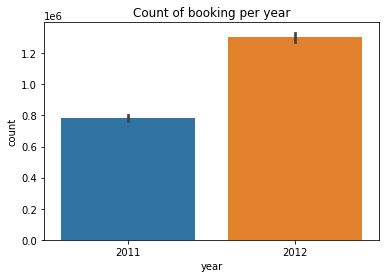

In [115]:
sns.barplot(x='year',y='count',data=df,estimator=sum)
plt.title('Count of booking per year')
plt.show()

Year 2012 has more rented bike

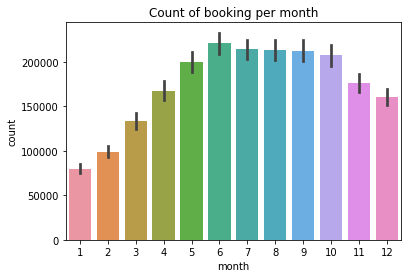

In [116]:
sns.barplot(x='month',y='count',data=df,estimator=sum)
plt.title('Count of booking per month')
plt.show()

Overall in two years,July month holds the record of highest rented bike
However,The bike sales is better during months August,September next to July in the Fall season with the  Clear, Few clouds, partly cloudy, partly cloudy weather

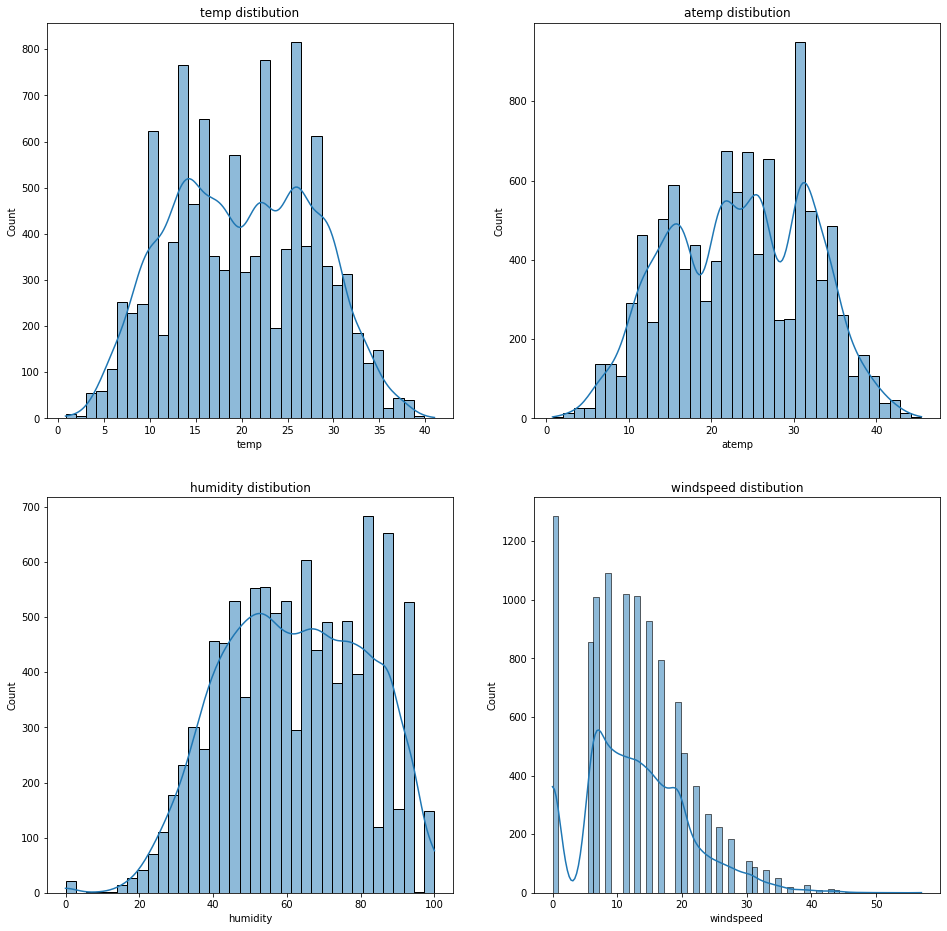

In [137]:
continuous_list=['temp','atemp','humidity','windspeed']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
count=0
for i in range(2):
  for j in range(2):
    sns.histplot(df[continuous_list[count]],ax=axis[i, j],kde=True)
    axis[i,j].set_title(f'{continuous_list[count]} distibution')
    count+=1
plt.show()

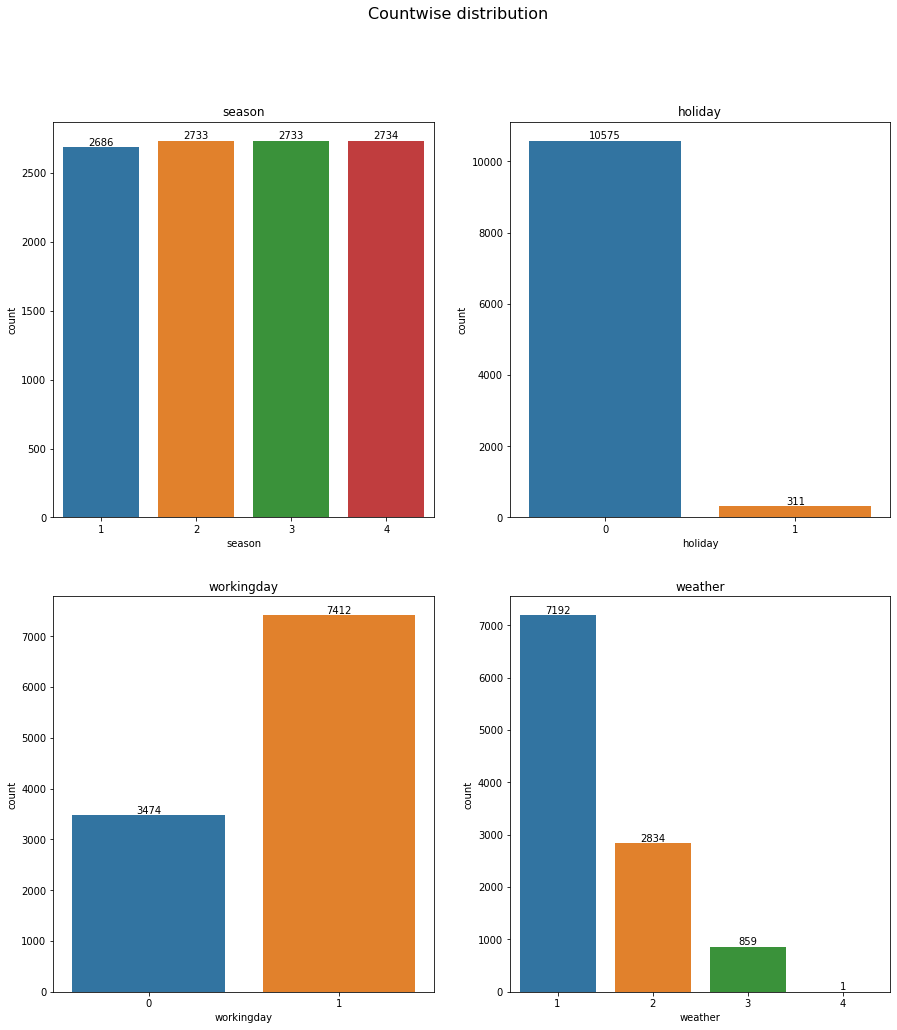

In [118]:
continuous_list=['season','holiday','workingday','weather']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15, 16))
count=0
fig.suptitle('Countwise distribution', fontsize=16)

for i in range(2):
  for j in range(2):
    sns.countplot(x=continuous_list[count],data=df,ax=axis[i, j])
    axis[i,j].set_title(f'{continuous_list[count]}')
    
    
    axis[i,j].bar_label(container=axis[i,j].containers[0])
    
    count+=1
plt.show()

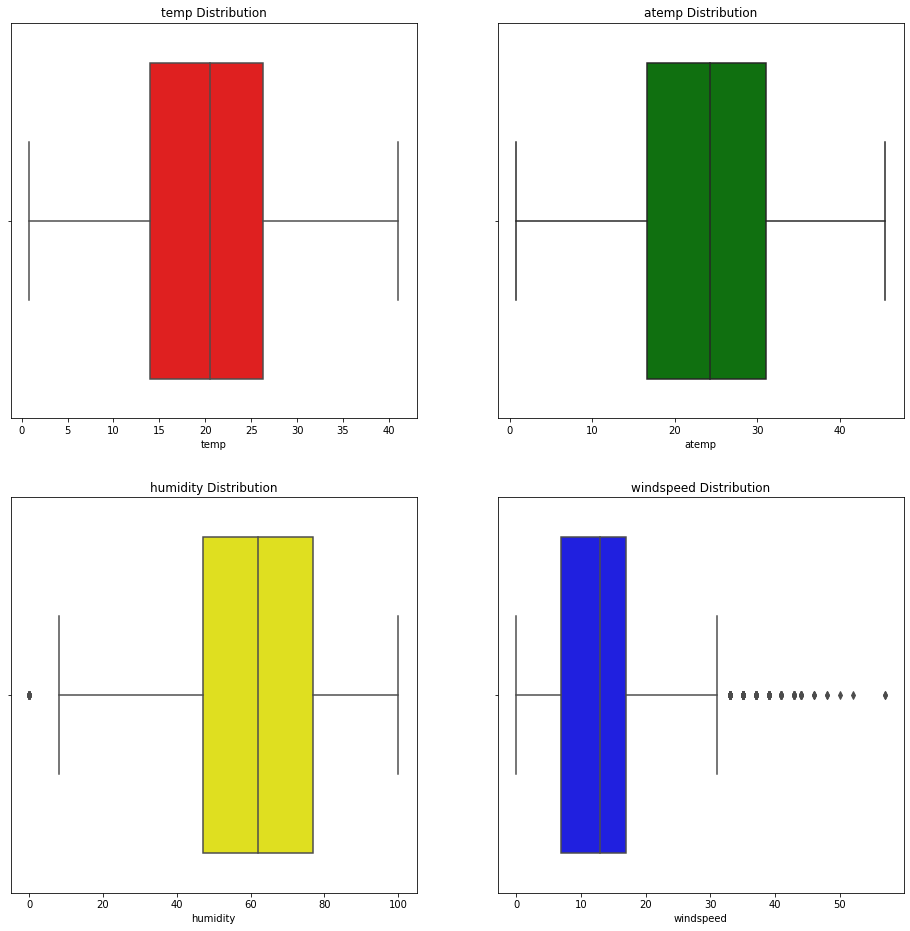

In [119]:
continuous_list=['temp','atemp','humidity','windspeed']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
k=0
#fig.suptitle('Countwise distribution', fontsize=16)
c=['red','green','yellow','blue']
for i in range(2):
  for j in range(2):
    sns.boxplot(x=continuous_list[k],data=df,ax=axis[i, j],color=c[k])
    axis[i,j].set_title(f'{continuous_list[k]} Distribution')
    
    
    #axis[i,j].bar_label(container=axis[i,j].containers[0])
    
    k+=1

plt.show()

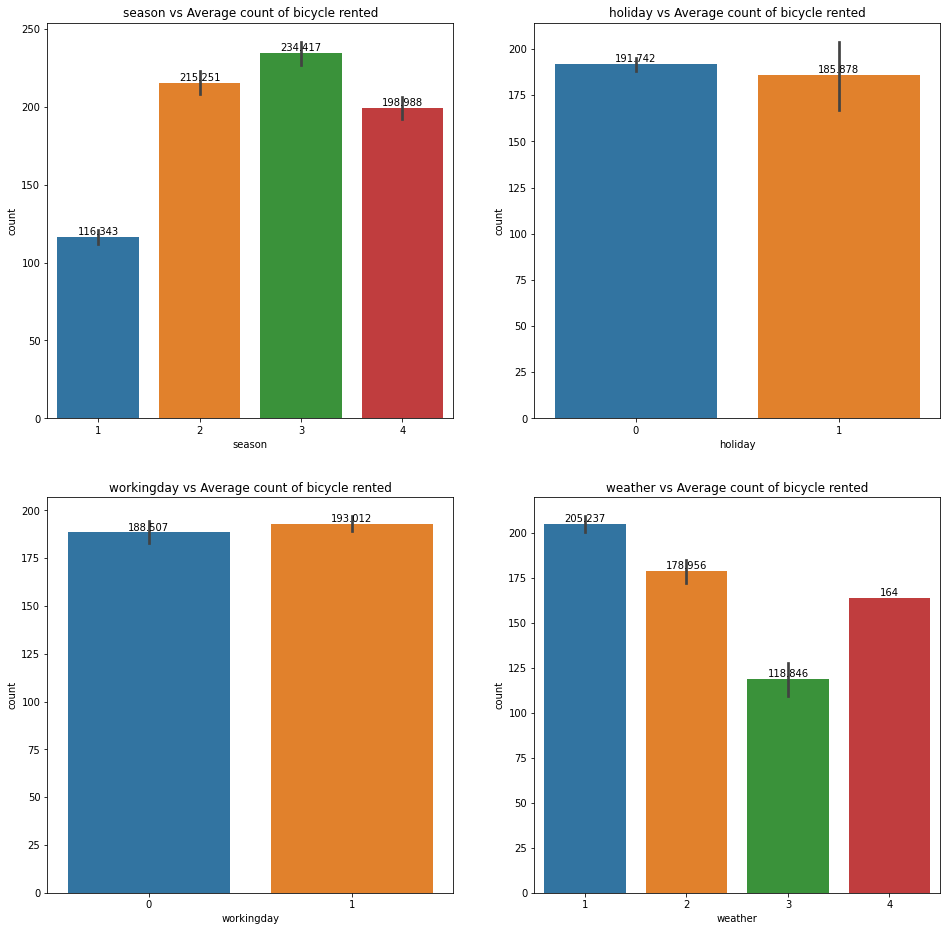

In [120]:
continuous_list=['season','holiday','workingday','weather']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
count=0
#fig.suptitle('Countwise distribution', fontsize=16)

for i in range(2):
  for j in range(2):
    sns.barplot(x=continuous_list[count],y='count',data=df,ax=axis[i, j])
    axis[i,j].set_title(f'{continuous_list[count]} vs Average count of bicycle rented')
    
    
    axis[i,j].bar_label(container=axis[i,j].containers[0])
    
    count+=1
plt.show()

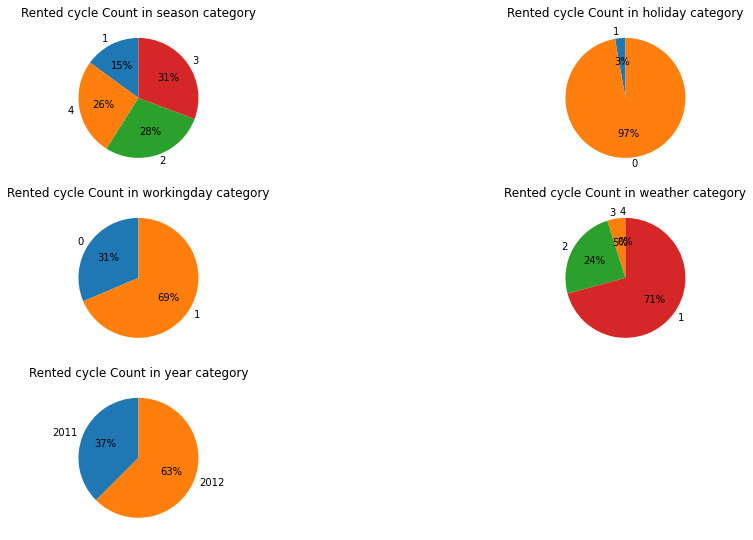

In [121]:
#Percentage Distribution using pie chart
continuous_list=['season','holiday','workingday','weather','year']
plt.figure(figsize=(16,16))
k=0
count=1
#fig.suptitle('Countwise distribution', fontsize=16)

for i in range(2):
  for j in range(2):
    plt.subplot(len(continuous_list),2,count)
    s = df.groupby(continuous_list[k])['count'].sum().sort_values(ascending=True)
    plt.pie(s, labels=s.index, autopct='%.0f%%', startangle = 90)
    plt.title(f'Rented cycle Count in {continuous_list[k]} category')
    count+=1
    k+=1
 
plt.subplot(len(continuous_list),2,count)
s = df.groupby(continuous_list[-1])['count'].sum().sort_values(ascending=True)
plt.pie(s, labels=s.index, autopct='%.0f%%', startangle = 90)
plt.title(f'Rented cycle Count in {continuous_list[-1]} category')
plt.show()

**Inference:**

**Season:**Season 3(31%) sees the highest amount of cycles rented, followed by 2(28%), 4(26%) and 1(15%).

**weather:** Users mostly rent cycle during weather 1(71%), followed by 2(24%) and 3(5%). Weather 4 was recorded only once

**Holiday:**Renting on non-holiday is more(97%)

**Workingday:**Renting is seen high on working day(69%)

**count:** 

1.Most of the cycles are rented in 2012(63%)

**Inference:**

**Humidity:**Average range is between 45-65 on bike renting with some outlier at 0

**Temp:**Average is around 20-22 degree on bike renting

**Atemp:**Average degree is around 25-27 on bike renting

**Windspeed:**Average windspeed is between 11-15 on days on renting with some outlier 


<AxesSubplot:xlabel='windspeed', ylabel='casual'>

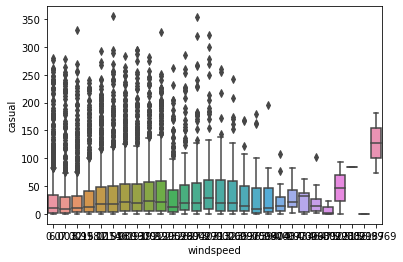

In [133]:
sns.boxplot(x='windspeed',y='casual',data=df)


<AxesSubplot:xlabel='windspeed', ylabel='registered'>

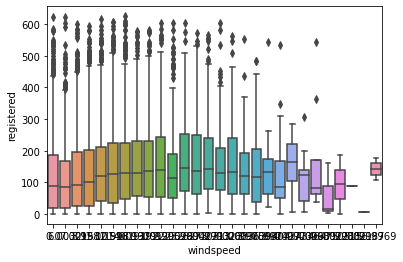

In [134]:
sns.boxplot(x='windspeed',y='registered',data=df)

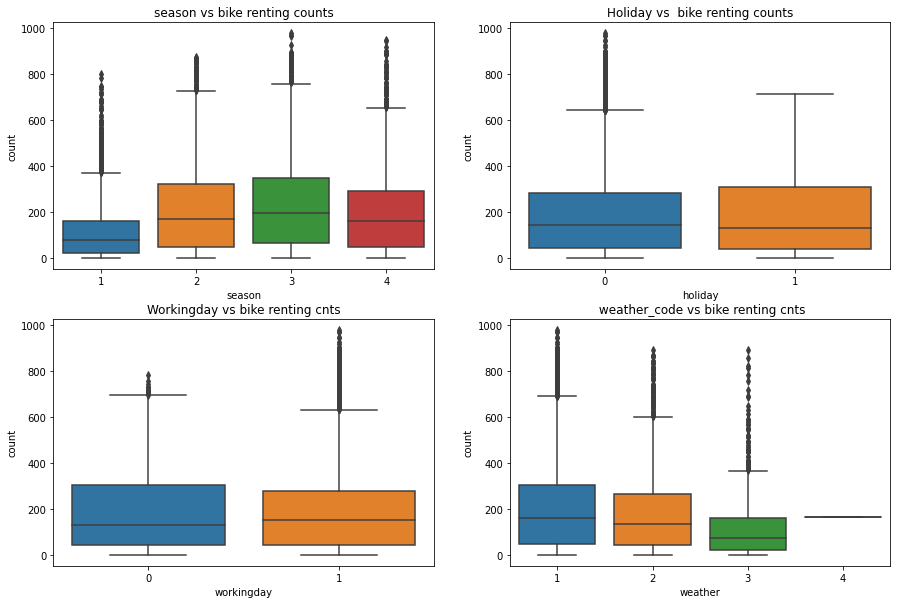

In [122]:
# Visualization before outlier removal
fig = plt.figure(figsize = (15,10))

ax1=fig.add_subplot(221)
sns.boxplot(x='season',y='count',data=df)
ax1.set_title('season vs bike renting counts')

ax1=fig.add_subplot(222)
sns.boxplot(x='holiday',y='count',data=df)
ax1.set_title('Holiday vs  bike renting counts')

ax1 = fig.add_subplot(223)
sns.boxplot(x = 'workingday', y = 'count', data = df)
ax1.set_title('Workingday vs bike renting cnts')

ax1 = fig.add_subplot(224)
sns.boxplot(x = 'weather', y = 'count', data =df)
ax1.set_title(' weather_code vs bike renting cnts')

plt.show()


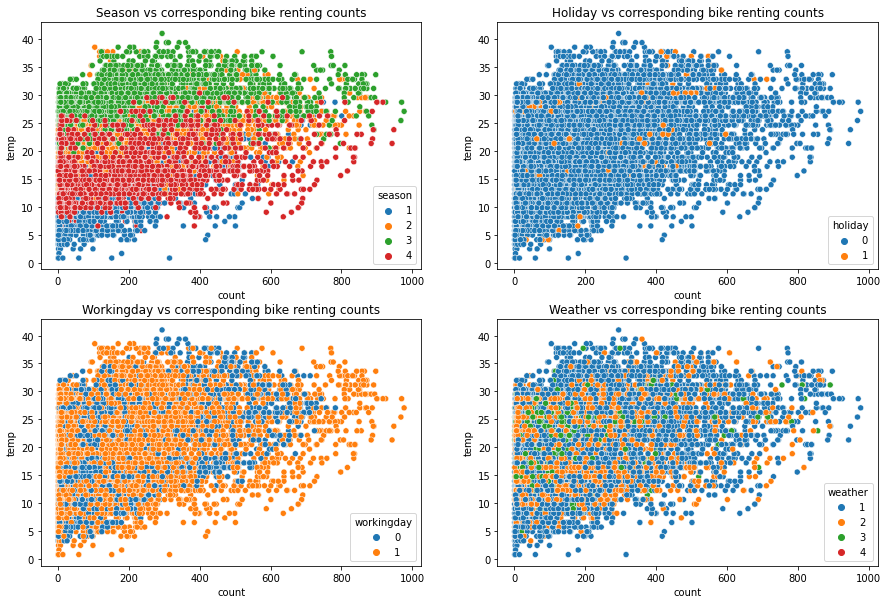

In [123]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.scatterplot(x = 'count', y = 'temp',data = df, hue ='season' )
ax1.set_title('Season vs corresponding bike renting counts')

ax1 = fig.add_subplot(222)
sns.scatterplot(x ='count', y = 'temp', data =df, hue ='holiday')
ax1.set_title('Holiday vs corresponding bike renting counts')

ax1 = fig.add_subplot(223)
sns.scatterplot(x = 'count', y = 'temp',data = df, hue ='workingday')
ax1.set_title('Workingday vs corresponding bike renting counts')

ax1 = fig.add_subplot(224)
sns.scatterplot(x = 'count',y = 'temp',data = df, hue ='weather')
ax1.set_title('Weather vs corresponding bike renting counts')

plt.show()

In [124]:
###outlier treatment

Q3 = df['count'].quantile(0.75)
Q1 = df['count'].quantile(0.25)
IQR = Q3-Q1
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
outlier_treated_df = df[(df['count']>lower) & (df['count']<upper)]

df=outlier_treated_df


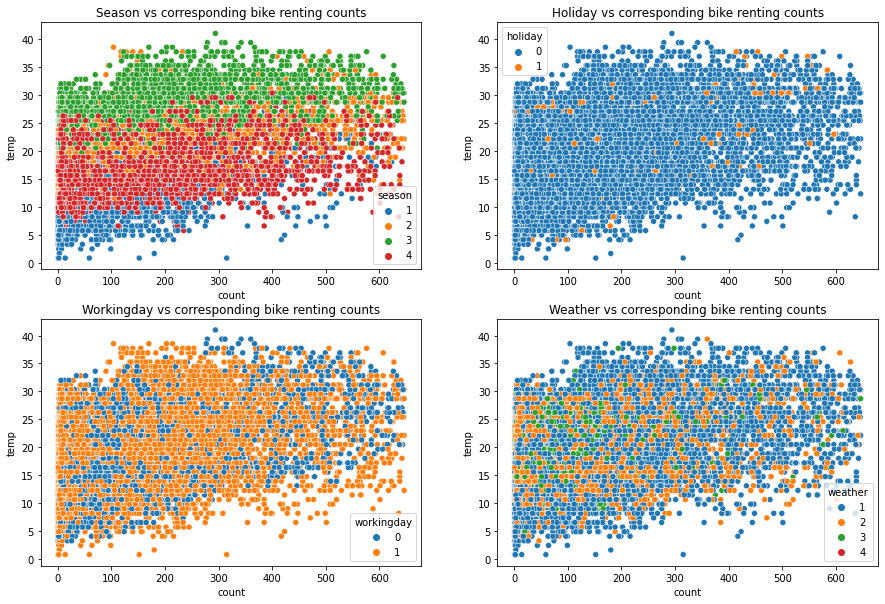

In [125]:
#Post treating outlier
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.scatterplot(x = 'count', y = 'temp',data = df, hue ='season' )
ax1.set_title('Season vs corresponding bike renting counts')

ax1 = fig.add_subplot(222)
sns.scatterplot(x ='count', y = 'temp', data =df, hue ='holiday')
ax1.set_title('Holiday vs corresponding bike renting counts')

ax1 = fig.add_subplot(223)
sns.scatterplot(x = 'count', y = 'temp',data = df, hue ='workingday')
ax1.set_title('Workingday vs corresponding bike renting counts')

ax1 = fig.add_subplot(224)
sns.scatterplot(x = 'count',y = 'temp',data = df, hue ='weather')
ax1.set_title('Weather vs corresponding bike renting counts')

plt.show()

(10583, 16)


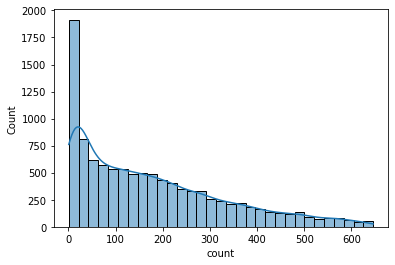

In [126]:
sns.histplot(data=outlier_treated_df,x='count',kde=True)
print(outlier_treated_df.shape)

<AxesSubplot:xlabel='count', ylabel='Count'>

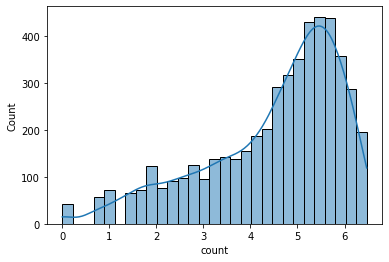

In [127]:
sns.histplot(np.log(df['count'].sample(5000)), kde = True)

Even after taking log ,still it is not normal

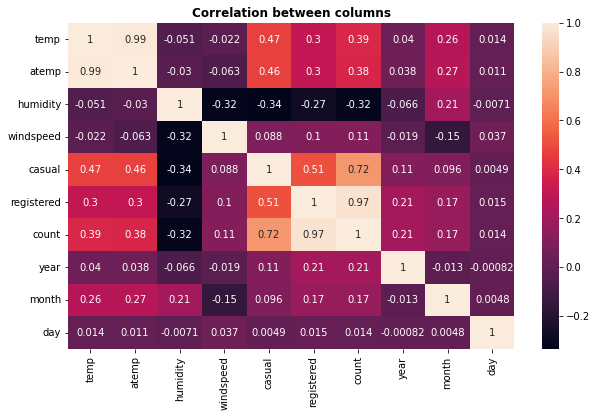

In [138]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between columns',fontweight="bold")
plt.show()

**Inference:**

The correlation between the features:

1.temp and atemp is high

2.month and casual users count is high

3.Registered users,Casual users and windspeed is high

4.Registered users and count of rented 



### Hypothesis Testing

In [128]:
### 2-sample T-test to check if Working Day has an effect on the number of electric cycles rented
#alpha=0.05
#H0:The bike's renting count in working days and non- working days are equal
#H1:The bike's renting count in working days and non- working days are not equal
working_data = df[df['workingday'] == 1].sample(2500, replace = True)
non_working_data = df[df['workingday'] == 0].sample(2500, replace = True)
stat.ttest_ind(a=working_data['count'],b=non_working_data['count'],equal_var=True)

Ttest_indResult(statistic=-1.1129236347461444, pvalue=0.26579475182344875)

Inference:

2-sample T-test to check if Working Day has an effect on the number of electric cycles rented:

P-value=0.99 which is greater than alpha(0.05).

Hence,we failed to reject null hypothesis(H0).
Working Day doesnt have any effect on number of electric cycles rented.

In [129]:
### No. of cycles rented similar or different in different weathers
df.groupby(['weather'])['count'].sum()

weather
1    1302807
2     460146
3      95083
4        164
Name: count, dtype: int64

In [130]:
df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [131]:

#H0:The mean count in different weathers are same
#H1:The mean count in different weathers are not same.
#Considering 95% confidence interval ,alpha=0.05
weather1=df[df['weather']==1].sample(1000,replace=True)
weather2=df[df['weather']==2].sample(1000,replace=True)
weather3=df[df['weather']==3].sample(1000,replace=True)
weather4=df[df['weather']==4].sample(1000,replace=True)
f_stat,p_value=stat.f_oneway(weather1['count'],weather2['count'],weather3['count'],weather4['count'])
print('p_value',p_value)

p_value 2.857098622259671e-43


Inference:

For this question,No. of cycles rented similar or different in different weather...

P-value(1.11e-41) is less than alpha(0.05)
Hence Rejecting null hypothesis .

This means that different weather is affecting the bike rental count

In [132]:
### No. of cycles rented similar or different in different season
df.groupby('season')['count'].count()

season
1    2670
2    2633
3    2616
4    2664
Name: count, dtype: int64

In [139]:
df.groupby(['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2670.0,112.795131,116.884929,1.0,24.00,78.0,161.00,644.0
2,2633.0,195.653627,166.170802,1.0,45.00,165.0,299.00,646.0
3,2616.0,210.484327,164.055532,1.0,59.75,185.0,323.25,646.0
4,2664.0,184.404655,154.563069,1.0,48.75,154.0,276.25,646.0


In [ ]:

#H0:The mean count in different season are same
#H1:The mean count in different season are not same.
#Considering 95% confidence interval ,alpha=0.05
season1=df[df['season']==1].sample(2000,replace=True)
season2=df[df['season']==2].sample(2000,replace=True)
season3=df[df['season']==3].sample(2000,replace=True)
season4=df[df['season']==4].sample(2000,replace=True)
f_stat,p_value=stat.f_oneway(season1['count'],season2['count'],season3['count'],season4['count'])
print('p_value',p_value)

p_value 2.003891713805368e-118


Inference:

For this question,No. of cycles rented similar or different in different seasons...

P-value(5.26e-106) is less than alpha(0.05)
Hence Rejecting null hypothesis .

This means that different season is affecting the bike rental count

In [ ]:
###Weather is dependent on season (check between 2 predictor variable)
#As weather 4 has only one value,we are not considering that for analysis
df_weather=df_original[df_original['weather']<4]
contigency_table = pd.crosstab(df_weather.weather,df.season,margins=True,margins_name='Total')
contigency_table

season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
Total,2685,2733,2733,2734,10885


In [ ]:
#Chi square test
#Calculating critical region for 95% Confidence interval
#H0:weather is independent on season
#H1:Weather is not independent on season
cr=stat.chi2.ppf(q=0.95,df=6)
print("critical region for 95% Confidence Interval is:",cr)

critical region for 95% Confidence Interval is: 12.591587243743977


In [ ]:
chi_stat,p_value,dof,exp_freq=stat.chi2_contingency(contigency_table)
print('p value is:',p_value)
print('dof is:',dof)
print('chi stat',chi_stat)

p value is: 6.664576536706683e-06
dof is: 12
chi stat 46.10145731073249


By Chi-Square Test,As p-value(6.66e-06) is less than alpha(0.05),We are rejecting null Hypothesis.

Hence we conclude that Weather is dependent on season.